## Machine Learning Plot

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
import sys, os
from pathlib import Path
from tqdm import tqdm
from scipy import stats
import multiprocessing as mp
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
sys.path.append(str(Path().resolve().parent.parent))
from path_manager import TEST_DATA_NB, PLOT_DIR

In [3]:
def curve_plot(mape_t, label, color):
    # Calculate mean and standard error
    mean_mape = np.mean(mape_t, axis=0)
    # std_error = np.std(mape_t, axis=0) / np.sqrt(mape_t.shape[0])

    # # Calculate confidence interval
    # confidence = 0.95
    # n = mape_t.shape[0]
    # t = np.abs(stats.t.ppf((1 - confidence) / 2, n - 1))
    # margin_of_error = t * std_error
    # confidence_interval = margin_of_error

    plt.plot(np.arange(10), mean_mape[1::2] * 100, label = label, color = color)
    # plt.fill_between(np.arange(25/5, 501/5, 25/5), (mean_mape - confidence_interval) * 100, (mean_mape + confidence_interval) * 100, alpha = 0.2, color = tuple(np.array(color) / 2))

In [4]:
# Initialize lists
time_intervals = np.array(['300~\n350', '300~\n400', '300~\n450', '300~\n500', '300~\n550', '300~\n600', '300~\n650', '300~\n700', '300~\n750', '300~\n800'])
linear_mape1 = []
knn_mape1 = []
decision_tree_mape1 = []
random_forest_mape1 = []
gaussian_process_mape1 = []
extremely_randomized_trees_mape1 = []
neural_network_mape1 = []

# Read the file
with open('V_Model-1_Time-Resolved_mape_results_all_models.txt', 'r') as file:
    next(file)  # Skip header
    for line in file:
        data = line.split(',')
        linear_mape1.append(float(data[1]))
        knn_mape1.append(float(data[2]))
        decision_tree_mape1.append(float(data[3]))
        random_forest_mape1.append(float(data[4]))
        gaussian_process_mape1.append(float(data[5]))
        extremely_randomized_trees_mape1.append(float(data[6]))
        neural_network_mape1.append(float(data[7]))

FileNotFoundError: [Errno 2] No such file or directory: 'V_Model-1_Time-Resolved_mape_results_all_models.txt'

In [5]:
# Initialize lists
linear_mape2 = []
knn_mape2 = []
decision_tree_mape2 = []
random_forest_mape2 = []
gaussian_process_mape2 = []
extremely_randomized_trees_mape2 = []
neural_network_mape2 = []

# Read the file
with open('V_Model-2_Time-Resolved_mape_results_all_models.txt', 'r') as file:
    next(file)  # Skip header
    for line in file:
        data = line.split(',')
        linear_mape2.append(float(data[1]))
        knn_mape2.append(float(data[2]))
        decision_tree_mape2.append(float(data[3]))
        random_forest_mape2.append(float(data[4]))
        gaussian_process_mape2.append(float(data[5]))
        extremely_randomized_trees_mape2.append(float(data[6]))
        neural_network_mape2.append(float(data[7]))

FileNotFoundError: [Errno 2] No such file or directory: 'V_Model-2_Time-Resolved_mape_results_all_models.txt'

In [6]:
plot1 = np.load('plot1.npy')
plot2 = np.load('plot2.npy')
plt.figure(figsize = (9/2.54, 8/2.54))
plt.plot(np.arange(10), random_forest_mape1, label = 'Using velocity features', color = 'royalblue')
plt.plot(np.arange(10), random_forest_mape2, label = 'Using velocity and classification features', color = 'orange')
curve_plot(plot1[9], 'Using battery test features', 'limegreen')
curve_plot(plot2[9], 'Using battery test and classification features', 'red')
plt.xticks(np.arange(10), time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)
# plt.title("Using random forest", fontname='Arial', fontsize=9)
# plt.xlim((0, 9))
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.savefig('plot3.png', format='png', dpi=1000)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'plot1.npy'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

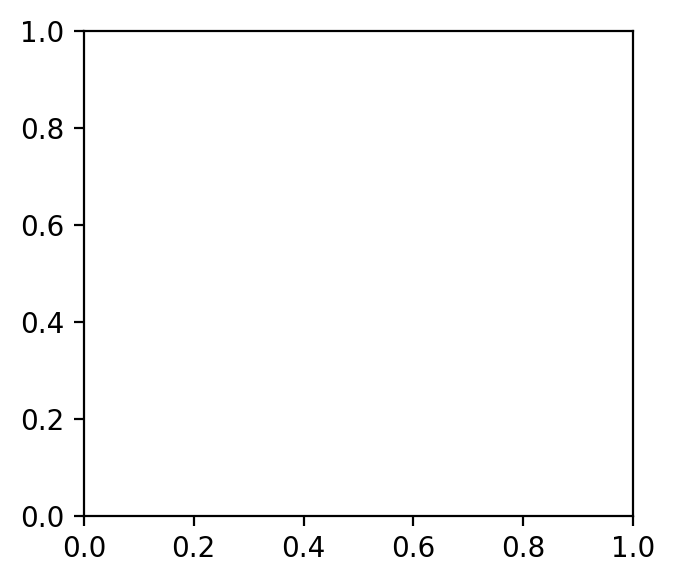

In [7]:
plt.figure(figsize = (9/2.54, 8/2.54))
plt.plot(np.arange(10), gaussian_process_mape1, label = 'Using velocity features', color = 'royalblue')
plt.plot(np.arange(10), gaussian_process_mape2, label = 'Using velocity and classification features', color = 'orange')
curve_plot(plot1[11], 'Using battery test features', 'limegreen')
curve_plot(plot2[11], 'Using battery test and classification features', 'red')
plt.xticks(np.arange(10), time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)
# plt.title("Using Gaussian process", fontname='Arial', fontsize=9)
# plt.xlim((0, 9))
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.savefig('plot4.png', format='png', dpi=1000)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (0,).

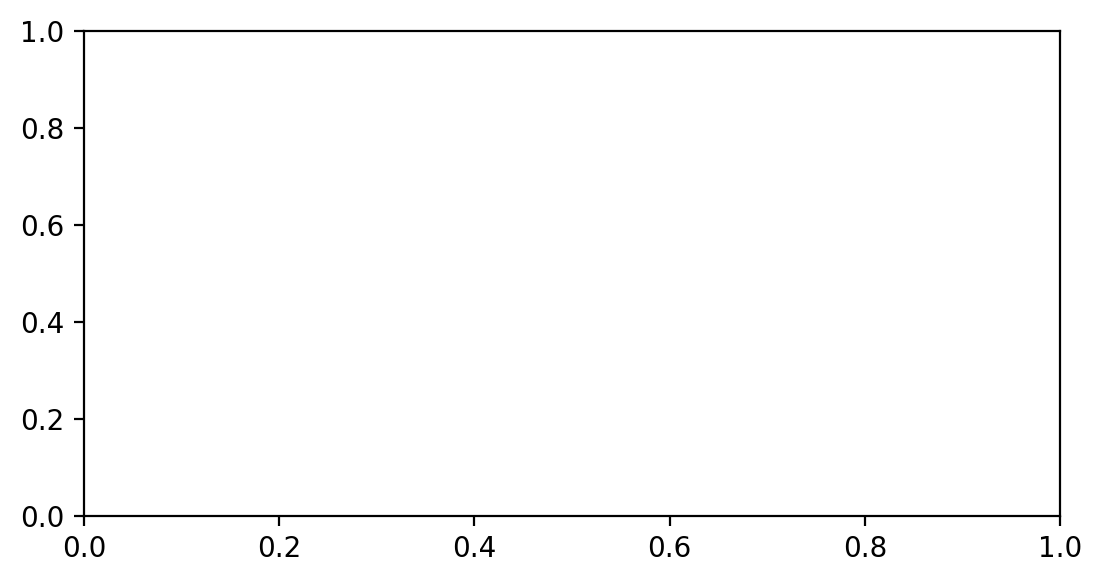

In [8]:
plt.figure(figsize=(16/2.54, 8/2.54))
time_intervals = np.array(['300~350', '300~400', '300~450', '300~500', '300~550', '300~600', '300~650', '300~700', '300~750', '300~800'])


# Create bar plots with edges
bar_width = 0.2  # Width of the bars
index = np.arange(10)

plt.bar(index - 1/2 * bar_width, random_forest_mape1, width=bar_width, label='Model 1 - Using velocity features', color='royalblue', edgecolor='black', linewidth=0.5)
plt.bar(index + 1/2 * bar_width, random_forest_mape2, width=bar_width, label='Model 2 - Using velocity and classification features', color='orange', edgecolor='black', linewidth=0.5)
plt.bar(index + 3/2 * bar_width, np.mean(plot1[9], axis=0)[1::2] * 100, width=bar_width, label='Model 3 - Using battery test features', color='limegreen', edgecolor='black', linewidth=0.5)
plt.bar(index + 5/2 * bar_width, np.mean(plot2[9], axis=0)[1::2] * 100, width=bar_width, label='Model 4 - Using battery test and classification features', color='red', edgecolor='black', linewidth=0.5)

plt.xticks(index + bar_width, time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)

# Adjust the legend and layout
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()

# Save the plot
# plt.savefig('plot5.png', format='png', dpi=1000)
plt.show()

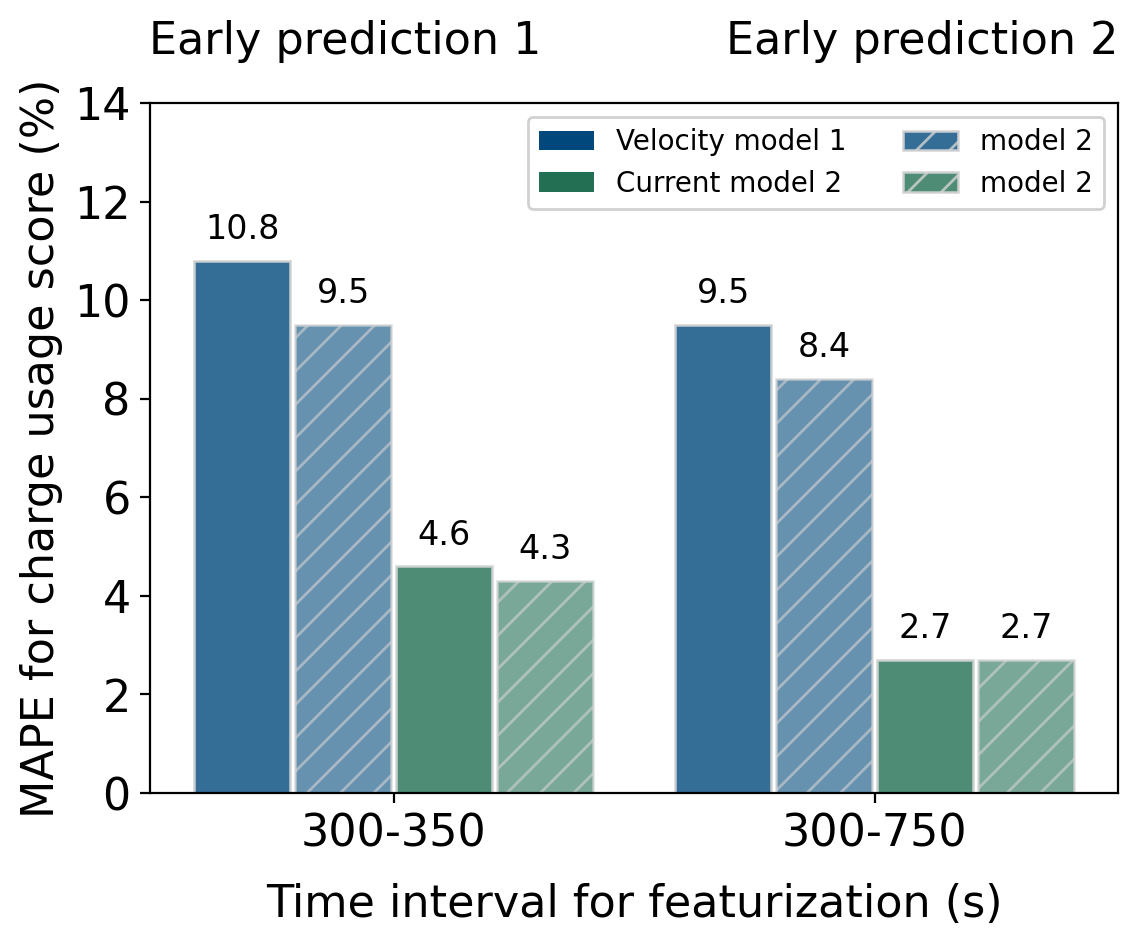

In [9]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 16
fig, ax1 = plt.subplots(figsize=(6, 5))

first_index_values = [10.8, 9.5, 4.6, 4.3]
eighth_index_values = [9.5, 8.4, 2.7, 2.7]

bar_labels = ['Velocity model 1', 'Velocity model 2',
              'Current model 1', 'Current model 2']
x_labels = ['300-350', '300-750']

bar_width = 0.20
gap = 0.01

positions1 = [0 - 1.5 * (bar_width + gap), 0 - 0.5 * (bar_width + gap),
              0 + 0.5 * (bar_width + gap), 0 + 1.5 * (bar_width + gap)]
positions2 = [1 - 1.5 * (bar_width + gap), 1 - 0.5 * (bar_width + gap),
              1 + 0.5 * (bar_width + gap), 1 + 1.5 * (bar_width + gap)]

# Create legend handles first
legend_elements = [
    plt.Rectangle((0,0), 1, 1, facecolor='#01497c', alpha=1, label='Velocity model 1'),
    plt.Rectangle((0,0), 1, 1, facecolor='#226f54', alpha=1, label='Current model 2'),
    plt.Rectangle((0,0), 1, 1, facecolor='#01497c', hatch='//', alpha=0.8, label='model 2', ec='lightgrey', fill=True),
    plt.Rectangle((0,0), 1, 1, facecolor='#226f54', hatch='//', alpha=0.8, label='model 2', ec='lightgrey', fill=True)
]

for i in range(len(first_index_values)):
    if i == 0:
        color, hatch, alpha = '#01497c', None, 0.8
    elif i == 1:
        color, hatch, alpha = '#01497c', '//', 0.6
    elif i == 2:
        color, hatch, alpha = '#226f54', None, 0.8
    elif i == 3: 
        color, hatch, alpha = '#226f54', '//', 0.6 

    # Plot bars
    plt.bar(positions1[i], first_index_values[i], width=bar_width, color=color, hatch=hatch, ec="lightgrey", alpha=alpha)
    plt.bar(positions2[i], eighth_index_values[i], width=bar_width, color=color, hatch=hatch, ec="lightgrey", alpha=alpha)

    # Add numerical values on top of bars
    plt.text(positions1[i], first_index_values[i] + 0.3, f'{first_index_values[i]:.1f}', 
             ha='center', va='bottom', color='black', fontsize=12)
    plt.text(positions2[i], eighth_index_values[i] + 0.3, f'{eighth_index_values[i]:.1f}', 
             ha='center', va='bottom', color='black', fontsize=12)

# Add legend with smaller font and two columns
legend = ax1.legend(handles=legend_elements, 
                   loc='upper right',
                   fontsize=10,
                   ncol=2,
                   bbox_to_anchor=(1, 1))
legend.get_frame().set_alpha(0.9)  # Make legend background slightly transparent

# Add group annotations
group1_center = sum(positions1[:2]) / 2 + 0.21  # Center of the first group
group2_center = sum(positions2[:2]) / 2 + 0.21  # Center of the second group

ax1.text(group1_center-0.1, 15, 'Early prediction 1', ha='center')
ax1.text(group2_center+0.1, 15, 'Early prediction 2', ha='center')

# Set x-ticks and labels
ax1.set_xticks([group1_center, group2_center])
ax1.set_xticklabels(x_labels)

plt.xlabel('Time interval for featurization (s)', labelpad=10)
plt.ylabel('MAPE for charge usage score (%)')
plt.ylim(0, 14)
plt.tight_layout()
plt.show()

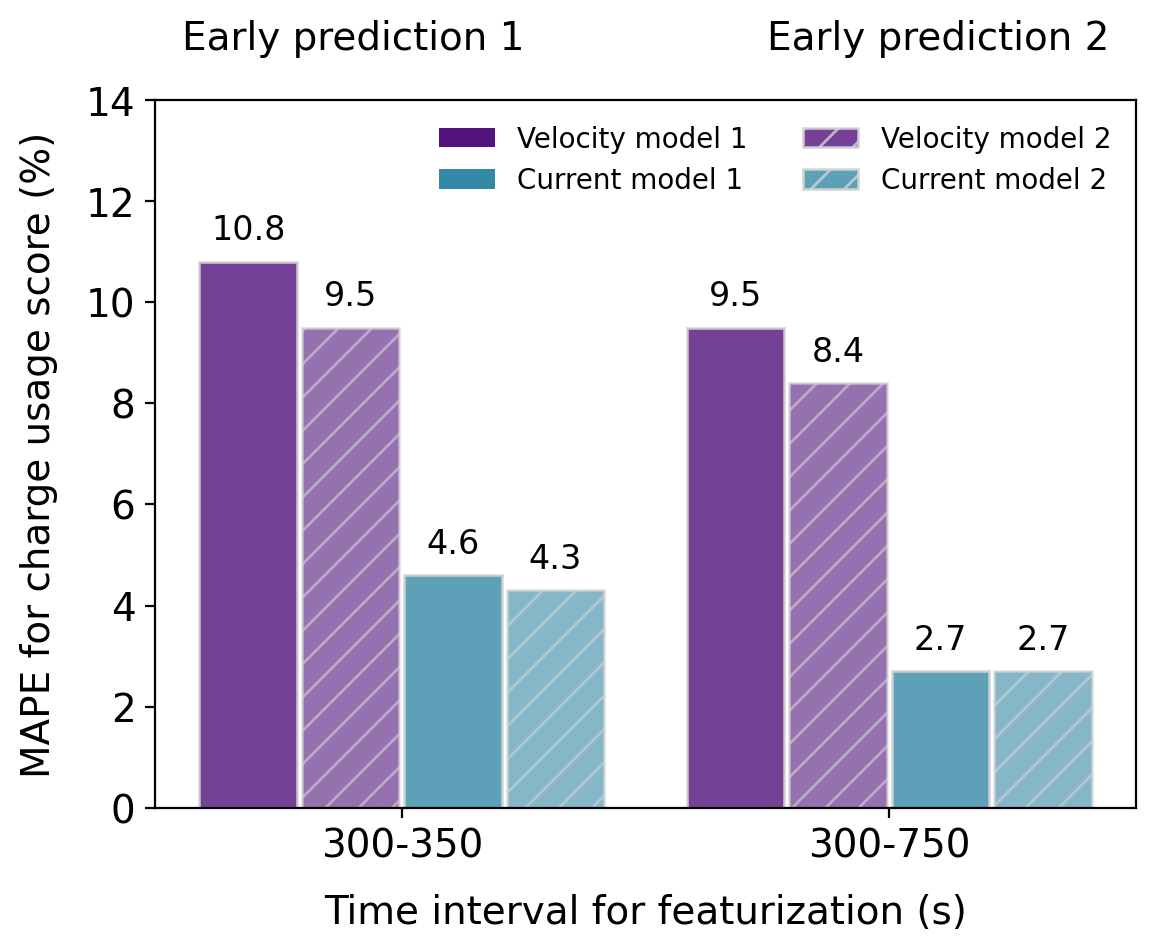

In [13]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 14
fig, ax1 = plt.subplots(figsize=(6, 5))

first_index_values = [10.8, 9.5, 4.6, 4.3]
eighth_index_values = [9.5, 8.4, 2.7, 2.7]

bar_labels = ['Velocity model 1', 'Velocity model 2',
              'Current model 1', 'Current model 2']
x_labels = ['300-350', '300-750']

velocity_color = sns.color_palette("magma", as_cmap=True)(0.25)
current_color = sns.color_palette("mako", as_cmap=True)(0.55)

bar_width = 0.20
gap = 0.01

positions1 = [0 - 1.5 * (bar_width + gap), 0 - 0.5 * (bar_width + gap),
              0 + 0.5 * (bar_width + gap), 0 + 1.5 * (bar_width + gap)]
positions2 = [1 - 1.5 * (bar_width + gap), 1 - 0.5 * (bar_width + gap),
              1 + 0.5 * (bar_width + gap), 1 + 1.5 * (bar_width + gap)]

# Create legend handles with new colors
legend_elements = [
    plt.Rectangle((0,0), 1, 1, facecolor=velocity_color, alpha=1, label='Velocity model 1'),
    plt.Rectangle((0,0), 1, 1, facecolor=current_color, alpha=1, label='Current model 1'),
    plt.Rectangle((0,0), 1, 1, facecolor=velocity_color, hatch='//', alpha=0.8, label='Velocity model 2', ec='lightgrey', fill=True),
    plt.Rectangle((0,0), 1, 1, facecolor=current_color, hatch='//', alpha=0.8, label='Current model 2', ec='lightgrey', fill=True)
]

for i in range(len(first_index_values)):
    if i == 0:
        color, hatch, alpha = velocity_color, None, 0.8
    elif i == 1:
        color, hatch, alpha = velocity_color, '//', 0.6
    elif i == 2:
        color, hatch, alpha = current_color, None, 0.8
    elif i == 3: 
        color, hatch, alpha = current_color, '//', 0.6 

    # Plot bars
    plt.bar(positions1[i], first_index_values[i], width=bar_width, color=color, hatch=hatch, ec="lightgrey", alpha=alpha)
    plt.bar(positions2[i], eighth_index_values[i], width=bar_width, color=color, hatch=hatch, ec="lightgrey", alpha=alpha)

    # Add numerical values on top of bars
    plt.text(positions1[i], first_index_values[i] + 0.3, f'{first_index_values[i]:.1f}', 
             ha='center', va='bottom', color='black', fontsize=12)
    plt.text(positions2[i], eighth_index_values[i] + 0.3, f'{eighth_index_values[i]:.1f}', 
             ha='center', va='bottom', color='black', fontsize=12)

# Add legend with smaller font and two columns
legend = ax1.legend(handles=legend_elements, 
                   loc='upper right',
                   fontsize=10,
                   ncol=2,
                   bbox_to_anchor=(1, 1),
                   frameon=False)  # Removed legend frame

# Add group annotations
group1_center = sum(positions1[:2]) / 2 + 0.21  # Center of the first group
group2_center = sum(positions2[:2]) / 2 + 0.21  # Center of the second group

ax1.text(group1_center-0.1, 15, 'Early prediction 1', ha='center')
ax1.text(group2_center+0.1, 15, 'Early prediction 2', ha='center')

# Set x-ticks and labels
ax1.set_xticks([group1_center, group2_center])
ax1.set_xticklabels(x_labels)

plt.xlabel('Time interval for featurization (s)', labelpad=10)
plt.ylabel('MAPE for charge usage score (%)', labelpad=10)
plt.ylim(0, 14)
plt.tight_layout()
fig.savefig(PLOT_DIR / 'early_prediction_comp.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()